In [1]:
pip install tensorflow-datasets

In [1]:
import tensorflow as tf
import numpy as np

a = [1.2, 3.4, 7.5, 4.1, 5.0, 1.0]
ds = tf.data.Dataset.from_tensor_slices(a) # objeto Dataset de TensorFlow

print(ds)

<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.float32, name=None)>


In [5]:
for i in ds:
  print(i)

tf.Tensor(1.2, shape=(), dtype=float32)
tf.Tensor(3.4, shape=(), dtype=float32)
tf.Tensor(7.5, shape=(), dtype=float32)
tf.Tensor(4.1, shape=(), dtype=float32)
tf.Tensor(5.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)


In [8]:
ds_b = ds.batch(4) # Agrupa los elementos del dataset en lotes (batches) de 4 elementos
for i, elem in enumerate(ds_b):
  print("batch {}: ".format(i), elem)

batch 0:  tf.Tensor([1.2 3.4 7.5 4.1], shape=(4,), dtype=float32)
batch 1:  tf.Tensor([5. 1.], shape=(2,), dtype=float32)


El primer batch contiene 4 elementos: [1.2, 3.4, 7.5, 4.1]

El segundo batch solo contiene 2 elementos: [5.0, 1.0] porque ya no quedaban más números en nuestro dataset original

In [12]:
tf.random.set_seed(1)

t_x = tf.random.uniform([4,3], dtype = tf.float32)
t_y = tf.range(4)
print(t_x.numpy())

ds_x = tf.data.Dataset.from_tensor_slices(t_x)
ds_y = tf.data.Dataset.from_tensor_slices(t_y)

ds_j = tf.data.Dataset.zip((ds_x, ds_y))

for example in ds_j:
  print("x: ", example[0].numpy(), " y: ", example[1].numpy())

[[0.16513085 0.9014813  0.6309742 ]
 [0.4345461  0.29193902 0.64250207]
 [0.9757855  0.43509948 0.6601019 ]
 [0.60489583 0.6366315  0.6144488 ]]
x:  [0.16513085 0.9014813  0.6309742 ]  y:  0
x:  [0.4345461  0.29193902 0.64250207]  y:  1
x:  [0.9757855  0.43509948 0.6601019 ]  y:  2
x:  [0.60489583 0.6366315  0.6144488 ]  y:  3


x serían los píxeles de la imagen -> datos de entrada (features)

y sería la categoría de la imagen (perro, gato, etc.) ->  etiqueta o valor que queremos predecir (label)

In [14]:
# Forma alternativa de hacer lo mismo que antes
ds_j1 = tf.data.Dataset.from_tensor_slices((t_x, t_y))

for example in ds_j1:
  print("x: ", example[0].numpy(), " y: ", example[1].numpy())

x:  [0.16513085 0.9014813  0.6309742 ]  y:  0
x:  [0.4345461  0.29193902 0.64250207]  y:  1
x:  [0.9757855  0.43509948 0.6601019 ]  y:  2
x:  [0.60489583 0.6366315  0.6144488 ]  y:  3


In [14]:
# normalizar o escalar los datos: La fórmula x*2-1 transforma números del rango [0,1] al rango [-1,1]
ds_t = ds_j.map(lambda x, y: (x*2-1, y))

for example in ds_t:
  print("x: ", example[0].numpy(), " y: ", example[1].numpy())

x:  [-0.6697383   0.80296254  0.26194835]  y:  0
x:  [-0.13090777 -0.41612196  0.28500414]  y:  1
x:  [ 0.951571   -0.12980103  0.32020378]  y:  2
x:  [0.20979166 0.27326298 0.22889757]  y:  3


In [16]:
# barajamos los datos y consideramos 2 numeros para barajar a la vez
ds_s = ds_j.shuffle(2)

for example in ds_s:
  print("x: ", example[0].numpy(), " y: ", example[1].numpy())

x:  [0.4345461  0.29193902 0.64250207]  y:  1
x:  [0.16513085 0.9014813  0.6309742 ]  y:  0
x:  [0.60489583 0.6366315  0.6144488 ]  y:  3
x:  [0.9757855  0.43509948 0.6601019 ]  y:  2


In [16]:
ds_b = ds_j.batch(3, drop_remainder=False)

b_x, b_y = next(iter(ds_b))

for i, (x, y) in enumerate(zip(b_x,b_y)):
  print("numelem in batch: ", i, "\n")
  print(x.numpy())
  print("label: ", y.numpy(), "\n")

numelem in batch:  0 

[0.16513085 0.9014813  0.6309742 ]
label:  0 

numelem in batch:  1 

[0.4345461  0.29193902 0.64250207]
label:  1 

numelem in batch:  2 

[0.9757855  0.43509948 0.6601019 ]
label:  2 



In [18]:
# repetimos para 2 epocas
ds = ds_j.batch(3).repeat(2)

for i, (b_x, b_y) in enumerate(ds):
  print(i, b_x.shape, b_y.numpy())

0 (3, 3) [0 1 2]
1 (1, 3) [3]
2 (3, 3) [0 1 2]
3 (1, 3) [3]


In [20]:
ds = ds_j.shuffle(4).batch(2).repeat(20) # Es como si barajaras un mazo de cartas 20 veces, y cada vez repartieras las cartas de dos en dos

for i, (b_x, b_y) in enumerate(ds):
  print(i, b_x.shape, b_y.numpy())

0 (2, 3) [1 2]
1 (2, 3) [3 0]
2 (2, 3) [1 3]
3 (2, 3) [0 2]
4 (2, 3) [2 1]
5 (2, 3) [3 0]
6 (2, 3) [0 1]
7 (2, 3) [2 3]
8 (2, 3) [0 3]
9 (2, 3) [1 2]
10 (2, 3) [0 1]
11 (2, 3) [3 2]
12 (2, 3) [3 0]
13 (2, 3) [1 2]
14 (2, 3) [1 3]
15 (2, 3) [0 2]
16 (2, 3) [0 2]
17 (2, 3) [3 1]
18 (2, 3) [3 1]
19 (2, 3) [2 0]
20 (2, 3) [3 2]
21 (2, 3) [0 1]
22 (2, 3) [2 0]
23 (2, 3) [3 1]
24 (2, 3) [3 2]
25 (2, 3) [0 1]
26 (2, 3) [0 3]
27 (2, 3) [1 2]
28 (2, 3) [0 1]
29 (2, 3) [2 3]
30 (2, 3) [3 0]
31 (2, 3) [1 2]
32 (2, 3) [1 3]
33 (2, 3) [2 0]
34 (2, 3) [3 1]
35 (2, 3) [0 2]
36 (2, 3) [1 2]
37 (2, 3) [0 3]
38 (2, 3) [3 0]
39 (2, 3) [1 2]


In [22]:
ds = ds_j.batch(2).shuffle(4).repeat(3)

for i, (b_x, b_y) in enumerate(ds):
  print(i, b_x.shape, b_y.numpy())

0 (2, 3) [0 1]
1 (2, 3) [2 3]
2 (2, 3) [0 1]
3 (2, 3) [2 3]
4 (2, 3) [2 3]
5 (2, 3) [0 1]


In [24]:
import pathlib

dir = pathlib.Path(".")

file_list = sorted([str(path) for path in dir.glob("*.jpg")])

print(file_list)

['cat-01.jpg', 'cat-02.jpg', 'cat-03.jpg', 'dog-01.jpg', 'dog-02.jpg', 'dog-03.jpg']


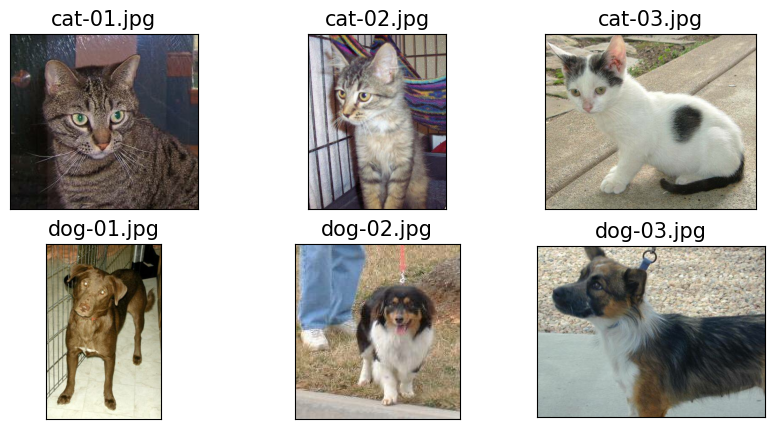

In [26]:
import matplotlib.pyplot as plt
import os

fig = plt.figure(figsize = (10,5))
for i, file in enumerate(file_list):
  img_raw = tf.io.read_file(file)
  img = tf.image.decode_image(img_raw)
  ax = fig.add_subplot(2,3,i+1)
  ax.set_xticks([])
  ax.set_yticks([])
  ax.imshow(img)
  ax.set_title(os.path.basename(file), size=15)



In [28]:
labels = [1 if "dog" in os.path.basename(file) else 0 for file in file_list]

print(labels)

ds = tf.data.Dataset.from_tensor_slices((file_list, labels))

for i in ds:
  print(i[0].numpy(), i[1].numpy())

[0, 0, 0, 1, 1, 1]
b'cat-01.jpg' 0
b'cat-02.jpg' 0
b'cat-03.jpg' 0
b'dog-01.jpg' 1
b'dog-02.jpg' 1
b'dog-03.jpg' 1


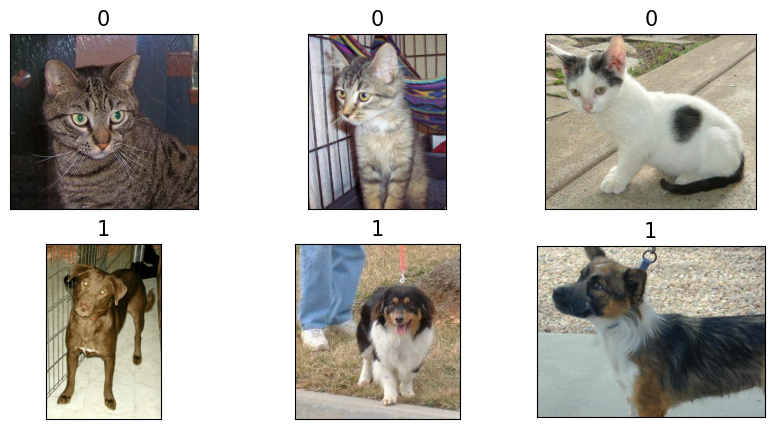

In [30]:
fig = plt.figure(figsize = (10,5))
for i, file in enumerate(file_list):
  img_raw = tf.io.read_file(file)
  img = tf.image.decode_image(img_raw)
  ax = fig.add_subplot(2,3,i+1)
  ax.set_xticks([])
  ax.set_yticks([])
  ax.imshow(img)
  ax.set_title(labels[i], size=15)

In [3]:
import tensorflow_datasets as tfds

print(len(tfds.list_builders()))

print(tfds.list_builders()[:20])

432
['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset', 'ai2_arc', 'ai2_arc_with_ir', 'ai2dcaption', 'aloha_mobile', 'amazon_us_reviews', 'anli', 'answer_equivalence', 'arc', 'asqa', 'asset', 'assin2', 'asu_table_top_converted_externally_to_rlds', 'austin_buds_dataset_converted_externally_to_rlds', 'austin_sailor_dataset_converted_externally_to_rlds', 'austin_sirius_dataset_converted_externally_to_rlds']


In [36]:
bd = tfds.builder("smallnorb")

print(bd.info.features)

FeaturesDict({
    'image': Image(shape=(96, 96, 1), dtype=uint8),
    'image2': Image(shape=(96, 96, 1), dtype=uint8),
    'instance': ClassLabel(shape=(), dtype=int64, num_classes=10),
    'label_azimuth': ClassLabel(shape=(), dtype=int64, num_classes=18),
    'label_category': ClassLabel(shape=(), dtype=int64, num_classes=5),
    'label_elevation': ClassLabel(shape=(), dtype=int64, num_classes=9),
    'label_lighting': ClassLabel(shape=(), dtype=int64, num_classes=6),
})


In [39]:
bd.download_and_prepare()

In [41]:
ds = bd.as_dataset(shuffle_files=False)

ds.keys()

dict_keys([Split('train'), Split('test')])

In [43]:
ds_train = ds["train"]

ds_t = ds_train.map(lambda item: (item["image"], tf.cast(item["label_category"], tf.int32)))

ds_t = ds_t.batch(18)
images, labels = next(iter(ds_t))

print(images.shape, labels.numpy())


(18, 96, 96, 1) [4 0 2 1 0 0 3 3 2 1 4 0 3 1 2 2 4 1]


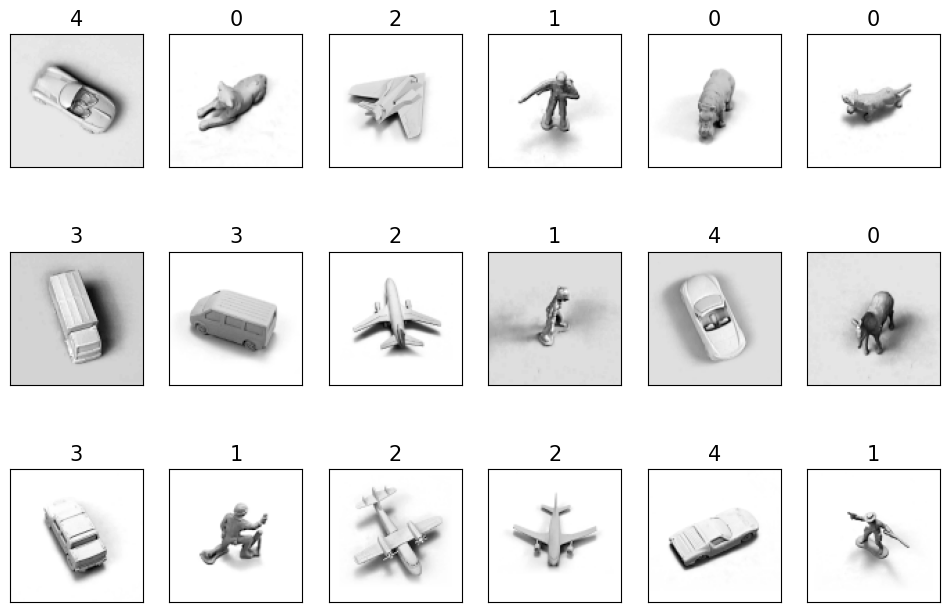

In [45]:
fig = plt.figure(figsize=(12,8))

for i, (image,label) in enumerate(zip(images,labels)):
  ax = fig.add_subplot(3,6,i+1)
  ax.set_xticks([])
  ax.set_yticks([])
  ax.imshow(image, cmap = "gray")
  ax.set_title("{}".format(label), size=15)



In [5]:
bd = tfds.builder("fashion_mnist")

print(bd.info.features)

FeaturesDict({
    'image': Image(shape=(28, 28, 1), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
})


In [9]:
ds, ds_info = tfds.load(
    'fashion_mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

In [13]:
ds

[<_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>]

In [15]:
ds_train = ds[0]

ds_t = ds_train.map(lambda image, label: (image, tf.cast(label, tf.int32)))

ds_t = ds_t.batch(18)
images, labels = next(iter(ds_t))
print(images.shape, labels.numpy())

(18, 28, 28, 1) [2 1 8 4 1 9 2 2 0 2 6 9 0 7 5 4 0 1]


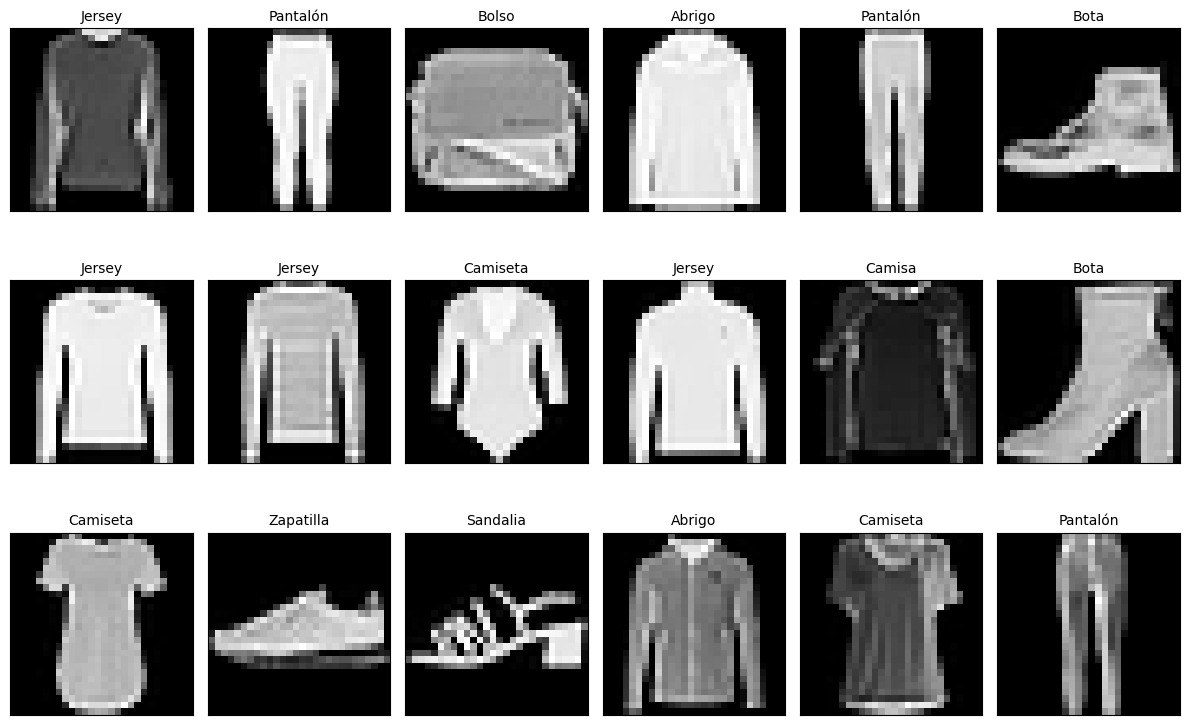

In [23]:
class_names = {
    0: 'Camiseta',
    1: 'Pantalón',
    2: 'Jersey',
    3: 'Vestido',
    4: 'Abrigo',
    5: 'Sandalia',
    6: 'Camisa',
    7: 'Zapatilla',
    8: 'Bolso',
    9: 'Bota'
}

fig = plt.figure(figsize=(12,8))

for i, (image,label) in enumerate(zip(images,labels)):
    ax = fig.add_subplot(3,6,i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(image, cmap="gray")
    ax.set_title("{}".format(class_names[label.numpy()]), size=10)

plt.tight_layout()
plt.show()